# Ford GoBike Dataset Exploration
## _by Yinghao Zhang_

## 1. Preliminary Wrangling
### 1.1 Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Because of the size of the dataset, this research only focuses on the data in 2017.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset and print the head of the dataset
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


### 1.2 Data Assessment
Then this dataset will be assessed to check if there are any problems in it.

In [3]:
df.shape

(519700, 15)

In [4]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object

From the table above, we can find that `member_birth_year` should be `int64` rather than `float64`.

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


There are some weird values in the statistics. First, the max value of `duration_sec` is 86369 which is far away from other values. Second, the min value of `member_birth_year` is 1886 which is weird. It is not reasonable for a 131-year-old person to have the ability to ride the bike. These two problems will be researched in the following exploration step.

In [6]:
# To check if there are null values in the dataset
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

Some values in `member_birth_year` and `member_gender` are missing. Since these null values do not account for a big amount, it will be removed from this dataset.

In [7]:
# check duplicated observations
df.duplicated().sum()

0

### 1.3 Data Cleaning
There are no duplicated values in this dataset. Now, the dataset will be cleaned by the following step.

In [8]:
# remove the null values
df_clean = df.dropna()

# change the type of 'member_birth_year'
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

# remove the columns that are unrelated to the research question
df_clean.drop(columns=['start_station_id', 'start_station_name', 
                                 'end_station_id', 'end_station_name', 'bike_id'], inplace=True)

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### 1.4 Dataset Overview
The property of cleaned dataset is shown below.

In [9]:
df_clean.shape

(453159, 10)

In [10]:
df_clean.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_latitude     float64
start_station_longitude    float64
end_station_latitude       float64
end_station_longitude      float64
user_type                   object
member_birth_year            int64
member_gender               object
dtype: object

In [11]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000
mean,832.934014,37.771968,-122.364093,37.772090,-122.363274,1980.404787
std,2525.280717,0.084914,0.104240,0.084811,0.103723,10.513488
min,61.000000,37.317298,-122.444293,37.317298,-122.444293,1886.000000
25%,364.000000,37.773492,-122.411726,37.773793,-122.409851,1974.000000
50%,556.000000,37.782411,-122.398525,37.782411,-122.397405,1983.000000
75%,838.000000,37.795392,-122.391034,37.795392,-122.391034,1988.000000
max,86252.000000,37.880222,-121.874119,37.880222,-121.874119,1999.000000


In [12]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,37.776435,-122.426244,37.778768,-122.415929,Customer,1987,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,37.784872,-122.400876,37.766210,-122.426614,Customer,1965,Female
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,37.868813,-122.258764,37.867789,-122.265896,Subscriber,1997,Female
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,37.866249,-122.299371,37.866249,-122.299371,Customer,1991,Female
12,2183,2017-12-31 23:52:55.5810,2018-01-01 00:29:18.7430,37.776639,-122.395526,37.789677,-122.390428,Subscriber,1990,Male


In [13]:
df_clean.tail()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,37.775880,-122.393170,37.781752,-122.405127,Subscriber,1991,Male
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,37.778742,-122.392741,37.780146,-122.403071,Subscriber,1973,Male
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,37.789625,-122.400811,37.782411,-122.392706,Subscriber,1985,Female
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,37.776619,-122.417385,37.774814,-122.418954,Subscriber,1981,Male
519699,188,2017-06-28 09:49:46.3770,2017-06-28 09:52:55.3380,37.787522,-122.397405,37.782411,-122.392706,Subscriber,1984,Male


### 1.5 What is the structure of your dataset?

After cleaning, there are 453159 rows and 15 features in this dataset. Some of them are numeric values, and some of them are categorical values. There are some special values like timestamp to show the start and end time, and the longtitude and latitude value to show the geopraphic location.

### 1.6 What is/are the main feature(s) of interest in your dataset?

I'm interested in what features are the best to predict the trip time duration.

### 1.7 What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the trip duration is related to certain days of the week and certain months. Also, other features like the distance from the start and end location, user types, genders, and birth years may have an effect on that.

## 2. Univariate Exploration
### 2.1 Duration
I'll start by looking at the distribution of the main variable: duration

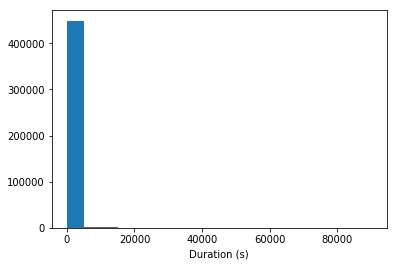

In [14]:
# plot the histogram of the time duration
bins = np.arange(61, 86369+5000, 5000)

plt.hist(data=df_clean, x='duration_sec', bins=bins)
plt.xlabel('Duration (s)');

The histogram shows the very high right-skewness of the duration distribution. So there may be some outliers that needed to be cleaned.

In [15]:
# find the outliers
df_out = df_clean.query('duration_sec > 20000')
df_out.shape

(1104, 10)

In [16]:
df_out.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,37.776435,-122.426244,37.778768,-122.415929,Customer,1987,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,37.784872,-122.400876,37.766210,-122.426614,Customer,1965,Female
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,37.868813,-122.258764,37.867789,-122.265896,Subscriber,1997,Female
320,27763,2017-12-31 10:14:07.0900,2017-12-31 17:56:50.9240,37.872355,-122.266447,37.869060,-122.270556,Customer,1996,Female
323,23910,2017-12-31 11:13:00.1740,2017-12-31 17:51:30.9120,37.783813,-122.434559,37.783830,-122.398870,Customer,1990,Female


There are 1104 observations which have a really high duration. Since these just account for a small proportion of the dataset, they will be filtered out.

In [17]:
# filter out the outlier
df_clean = df_clean.query('duration_sec <= 20000')

Then, the duration histogram will be ploted again.

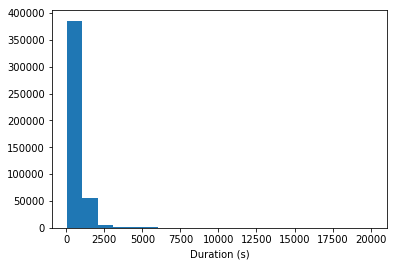

In [18]:
# set bins for the duration histogram
bins = np.arange(61, 20000+1000, 1000)

# plot the histogram
plt.hist(data=df_clean, x='duration_sec', bins=bins)
plt.xlabel('Duration (s)');

Since the histogram is still right skewed. The log scale will be implemented.

In [19]:
np.log10(df_clean.duration_sec.describe())

count    5.655191
mean     2.861311
std      2.962255
min      1.785330
25%      2.561101
50%      2.744293
75%      2.922206
max      4.300856
Name: duration_sec, dtype: float64

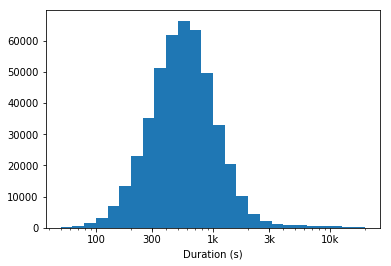

In [20]:
# set bins and ticks for the duration histogram
bins = 10 ** np.arange(1.7, 4.3+0.1, 0.1)
ticks = [100, 300, 1000, 3000, 10000]
labels = [100, 300, '1k', '3k', '10k']

# plot the histogram
plt.hist(data=df_clean, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration (s)');

The duration displays a unimodel distribution with a peak around 500.
### 2.2 Birth Year
Next, another potential problem, the birth year, will be discovered.

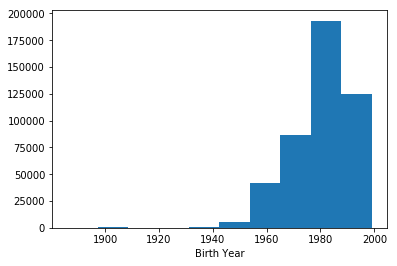

In [21]:
# plot the histogram of birth year
plt.hist(data=df_clean, x='member_birth_year')
plt.xlabel('Birth Year');

We can see that the proportion below 1940 is small. These data will be checked.

In [22]:
df_clean.query('member_birth_year < 1940').shape

(745, 10)

It is uncommon that people with an age over 80 can ride the bike. Thus, data points below 1937 will be filtered out.

In [23]:
# filter out the outlier
df_clean = df_clean.query('member_birth_year > 1937')

Then the birth year distribution is ploted.

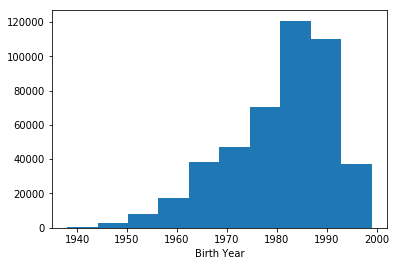

In [24]:
# plot the birth year histogram.
plt.hist(data=df_clean, x='member_birth_year')
plt.xlabel('Birth Year');

From the histogram above, the largest distribution of people is born around 1985. And there is a steep jump around 1995.
### 2.3 Location and Distance
Next, the pattern of distance will be discovered. But firstly, we need to have a look at the distribution of location.

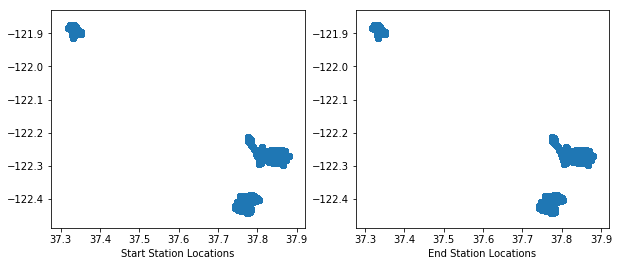

In [25]:
# plot the distribution of location
plt.figure(figsize=[10, 4])

plt.subplot(1, 2, 1)
plt.scatter(data=df_clean, x='start_station_latitude', y='start_station_longitude')
plt.xlabel('Start Station Locations')

plt.subplot(1, 2, 2)
plt.scatter(data=df_clean, x='end_station_latitude', y='end_station_longitude')
plt.xlabel('End Station Locations');

It is obvious that the start and end stations are distributed at three locations.

Next, we need to calculate the distance by doing some feature engineerings.

In [26]:
# calculate the distance
df_clean['distance'] = np.sqrt((df_clean.start_station_longitude - df_clean.end_station_longitude) ** 2
                               + (df_clean.start_station_latitude - df_clean.end_station_latitude) ** 2)

In [27]:
df_clean.distance.describe()

count    451369.000000
mean          0.015966
std           0.009736
min           0.000000
25%           0.009311
50%           0.013947
75%           0.020489
max           0.601468
Name: distance, dtype: float64

Then, the pattern of distance will be discovered.

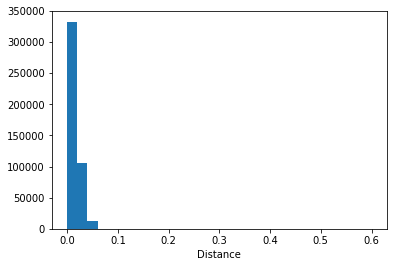

In [28]:
# plot the histogram of the distance
bins = np.arange(0, 0.6+0.02, 0.02)
plt.hist(data=df_clean, x='distance', bins=bins)
plt.xlabel('Distance');

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


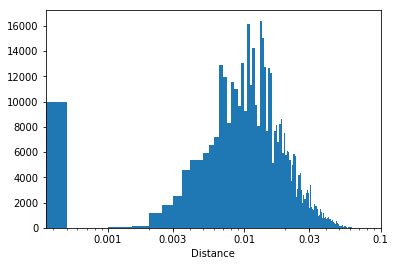

In [29]:
# do the log transformation for the distance
bins = np.arange(0, 0.6+0.0005, 0.0005)
ticks = [0.001, 0.003, 0.01, 0.03, 0.1]

plt.hist(data=df_clean, x='distance', bins=bins)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlim(0, 0.1)
plt.xlabel('Distance');

The plot show some interesting things. Firstly, there are 10000 observations showing the distance is lower than 0.0005. These data indicate that the start and end location are the same with no movement of longitude and latitude. Secondly, the remaining data show a unimodal distribution and the peak is around 0.015.
### 2.4 Month, Day, and Day of Week
Next, the pattern of using month, day, and day of week will discovered. But first, we need to extract these things. Since the start and end time are equivalent, we only research the start time.

In [30]:
# extract the start and end date
from datetime import datetime

df_clean['start_date'] = df_clean.start_time.map(lambda x: x[:10])
df_clean['start_date'] = df_clean.start_date.map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_clean['end_date'] = df_clean.end_time.map(lambda x: x[:10])
df_clean['end_date'] = df_clean.end_date.map(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# remove the unrelevant column
df_clean.drop(columns=['start_time', 'end_time'], inplace=True)

df_clean.head()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,distance,start_date,end_date
6,4507,37.866249,-122.299371,37.866249,-122.299371,Customer,1991,Female,0.000000,2017-12-31,2018-01-01
12,2183,37.776639,-122.395526,37.789677,-122.390428,Subscriber,1990,Male,0.013999,2017-12-31,2018-01-01
13,2170,37.776639,-122.395526,37.789677,-122.390428,Subscriber,1990,Male,0.013999,2017-12-31,2018-01-01
15,1544,37.795001,-122.399970,37.788059,-122.391865,Subscriber,1980,Female,0.010672,2017-12-31,2018-01-01
16,1474,37.795001,-122.399970,37.788059,-122.391865,Subscriber,1979,Male,0.010672,2017-12-31,2018-01-01


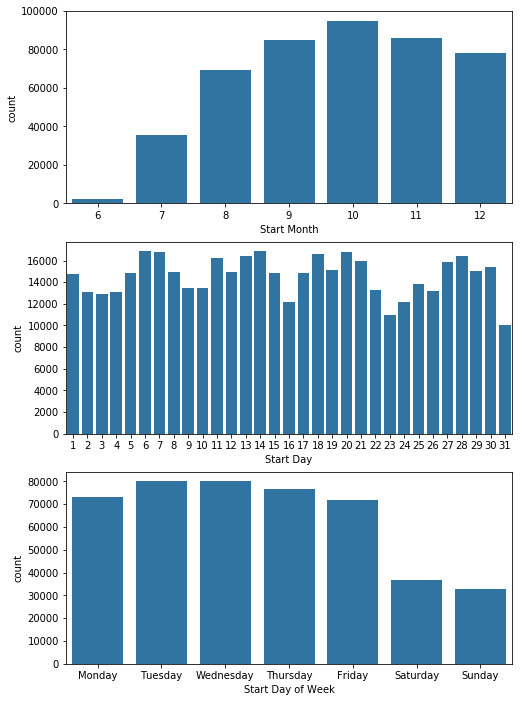

In [31]:
# extract the month, day, and day of week from the 'start_day'
df_clean['start_month'] = df_clean.start_date.map(lambda x: x.month)
df_clean['start_day'] = df_clean.start_date.map(lambda x: x.day)
df_clean['start_dayofweek'] = df_clean.start_date.map(lambda x: x.dayofweek)

base_color = sns.color_palette()[0]
plt.figure(figsize=[8, 12])

# plot the month
plt.subplot(3, 1, 1)
sns.countplot(data=df_clean, x='start_month', color=base_color)
plt.xlabel('Start Month')

# plot the start day
plt.subplot(3, 1, 2)
sns.countplot(data=df_clean, x='start_day', color=base_color)
plt.xlabel('Start Day')

# plot the start day of week
plt.subplot(3, 1, 3)
sns.countplot(data=df_clean, x='start_dayofweek', color=base_color)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Start Day of Week');

From the three plots above, the start month shows a unimodal distribution with a peak in October. In the start day of week, Saturday and Sunday show a steep jump in usage. However, there are no obvious patterns in the start day.
### 2.5 Other variables
Finally, other categorical variables are plotted.

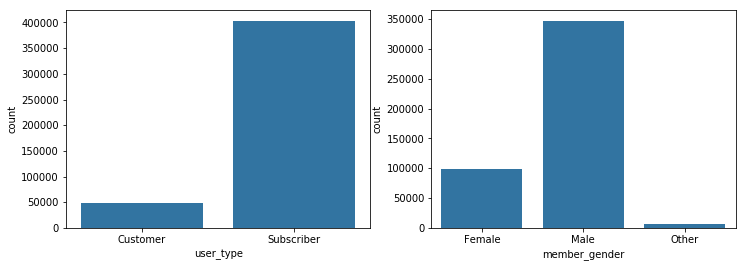

In [32]:
# plot the bar chart of user type
fig, ax = plt.subplots(ncols=2, figsize=[12, 4])

base_color = sns.color_palette()[0]
sns.countplot(data=df_clean, x='user_type', color=base_color, ax=ax[0])
sns.countplot(data=df_clean, x='member_gender', color=base_color, ax=ax[1]);

The number of subscriber largely exceeds that of customer, and the number of male largely exceeds the number of female and the other.

### 2.6 Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The duration shows a unimodal distribution with a peek around 500s after the log transformation. The duration bigger than 20000s is seen as the outlier and filtered out.
- The birth year shows that the user born between 1980 and 1990 accounts for the largest proportion. The user aging above 80 is seen as outliers and filtered out.
- The geographic coordinate is clustered at three locations. By calculating the relative distance, the distance shows a unimodal distribution with a peek around 0.015 under the log transformation. However, there are 10000 observations which are likely to be seen as no location change. 
- October shows the most frequent usage of the bike, and Saturday and Sunday shows the steep jump in usage.
- The number of subscribers are much more than that of customers, while the number of males are much more than that of female and other.

### 2.7 Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Some distributions are highly left- or right-skewed. They are partly because of the scale and partly because of the outlier. The outlier is filtered out and the log scale is used for transformation.

## 3. Bivariate Exploration

To start off, let's still show the feature we have now.

In [33]:
df_clean.dtypes

duration_sec                        int64
start_station_latitude            float64
start_station_longitude           float64
end_station_latitude              float64
end_station_longitude             float64
user_type                          object
member_birth_year                   int64
member_gender                      object
distance                          float64
start_date                 datetime64[ns]
end_date                   datetime64[ns]
start_month                         int64
start_day                           int64
start_dayofweek                     int64
dtype: object

### 3.1 Duration vs. Distance
First, we calculate the correlation between duration and distance.

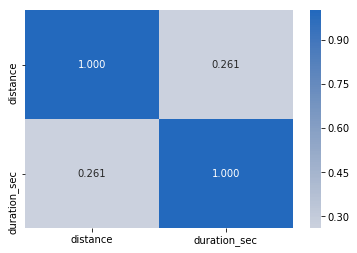

In [34]:
sns.heatmap(df_clean[['distance', 'duration_sec']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

The correlation between these two variables is low, showing that the expectation is wrong.
### 3.2 Duration vs. Birth Year
Next, we will discover the relation between the duration and the birth year. First, the heatmap is drawn.

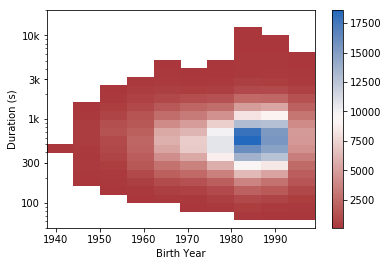

In [35]:
# plot the heatmap between the birth year and duration
y_bins = 10 ** np.arange(1.7, 4.3+0.1, 0.1)
y_ticks = [100, 300, 1000, 3000, 10000]
y_labels = [100, 300, '1k', '3k', '10k']

plt.hist2d(data=df_clean, x='member_birth_year', y='duration_sec', cmap='vlag_r', cmin=100, bins=[10, y_bins])
plt.colorbar()
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('Birth Year')
plt.ylabel('Duration (s)');

The heatmap shows that the largest proportion of people is distributed around 1985 birth year and 800 sec duration.

Next, other patterns will be researched by using the adapted point plot.

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


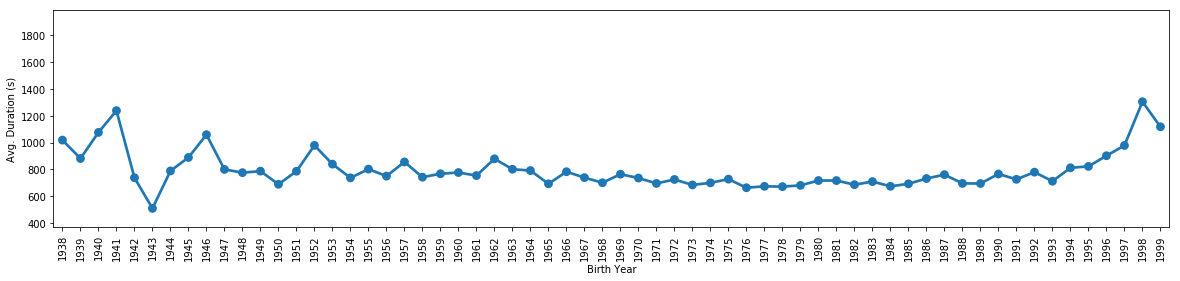

In [36]:
# plot the point plot of the birth year
plt.figure(figsize=[20, 4])

sns.pointplot(data=df_clean, x='member_birth_year', y='duration_sec', errwidth=0)
plt.xticks(rotation=90)
plt.xlabel('Birth Year')
plt.ylabel('Avg. Duration (s)');

This plot shows a overall stable trend for different birth years, keeping the average duration at 800s. However, people born in 1943 show a deep low duration, and people born after 1994 show an increase of duration from the overall level.
### 3.3 Duration vs. Month
Next, the plot will dipict the change for different months in 2017.

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


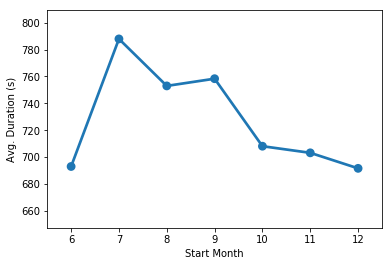

In [37]:
# plot the point plot of month
sns.pointplot(data=df_clean, x='start_month', y='duration_sec', errwidth=0)
plt.xlabel('Start Month')
plt.ylabel('Avg. Duration (s)');

The plot show a steep rise of duration in July and a stable decrease from July to December.
### 3.4 Duration vs. Other Categorical Variables
Next, the relationship between duration and other categorical variables will be discussed.

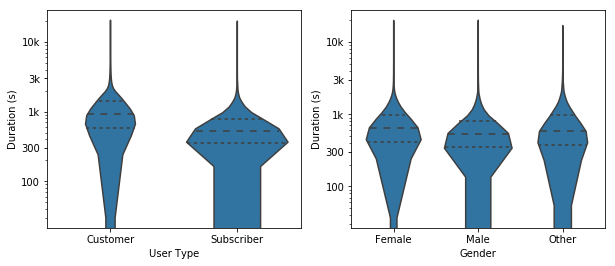

In [38]:
y_ticks = [100, 300, 1000, 3000, 10000]
y_labels = [100, 300, '1k', '3k', '10k']
base_color = sns.color_palette()[0]
plt.figure(figsize=[10, 4])

# plot the violinplot for the user type
plt.subplot(1, 2, 1)
sns.violinplot(data=df_clean, x='user_type', y='duration_sec', color=base_color, inner='quartile')
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('User Type')
plt.ylabel('Duration (s)')

# plot the violinplot for the gender
plt.subplot(1, 2, 2)
sns.violinplot(data=df_clean, x='member_gender', y='duration_sec', color=base_color, inner='quartile')
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('Gender')
plt.ylabel('Duration (s)');

From the violin plot above, the subscriber has both lower median and lower mode than the customer. The interesting thing is that when the duration is below than about 200, the subscriber shows a even distribution. The male, female, and other have a nearly same median and mode, and all of them show the even distribution when the duration is low, while the even distribution of male is more obvious that the other.
### 3.5 Categorical vs. Categorical
Finally, the relationship of different categorical variables will be discovered.

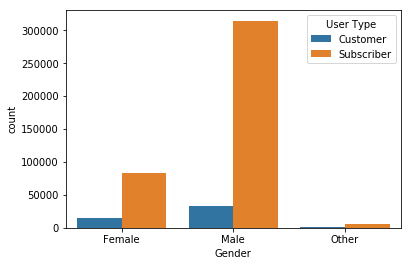

In [39]:
# plot the relationship between user type and gender
sns.countplot(data=df_clean, x='member_gender', hue='user_type')
plt.xlabel('Gender')
plt.legend(title='User Type');

The number of subscriber is much more than that of the customer. The male subscriber shows a very huge proportion of the total sample.

### 3.6 Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- The duration and distance shows a very low correlation
- Before 1994, people born in different years show a stability at 800 sec average duration, except a drastic fluctuation before 1954. After that, people have a increasing average duration of bike trip.
- The average duration shows a rapid increase before July and a stable decrease after that.
- The subscriber has a lower mode and median of duration than the customer, while this pattern of the male, female, and other keep the same. The subscriber and male show obvious even distribution when the duration is below 200 sec.

### 3.7 Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- The number of subscriber is much more than that of the customer
- The male subscriber accounts for a very huge proportion

## 4. Multivariate Exploration
First, we still need to review the dataset.

In [40]:
df_clean.dtypes

duration_sec                        int64
start_station_latitude            float64
start_station_longitude           float64
end_station_latitude              float64
end_station_longitude             float64
user_type                          object
member_birth_year                   int64
member_gender                      object
distance                          float64
start_date                 datetime64[ns]
end_date                   datetime64[ns]
start_month                         int64
start_day                           int64
start_dayofweek                     int64
dtype: object

### 4.1 Duration vs. Birth Year vs. Categorical Variables
The first thing in which I'm interested is to add categorical variables into different plots.

In [41]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    y_bins = 10 ** np.arange(1.7, 4.3+0.1, 0.1)
    y_ticks = [100, 300, 1000, 3000, 10000]
    y_labels = [100, 300, '1k', '3k', '10k']
    
    plt.hist2d(x, y, bins = [10, y_bins], cmap = palette, cmin = 100)
    plt.yscale('log')
    plt.yticks(y_ticks, y_labels)

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:718: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:718: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


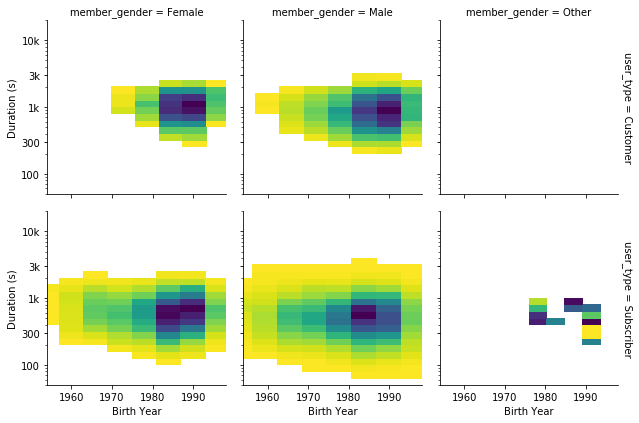

In [42]:
# plot the heatmap
g = sns.FacetGrid(data=df_clean, col='member_gender', row='user_type', margin_titles=True)
g.map(hist2dgrid, 'member_birth_year', 'duration_sec', color='viridis_r')
g.set_xlabels('Birth Year')
g.set_ylabels('Duration (s)');

The peak of distribution for different people is nearly the same. However, the male subscriber accounts for a major proportion.

Next, the point plot will be discovered.

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


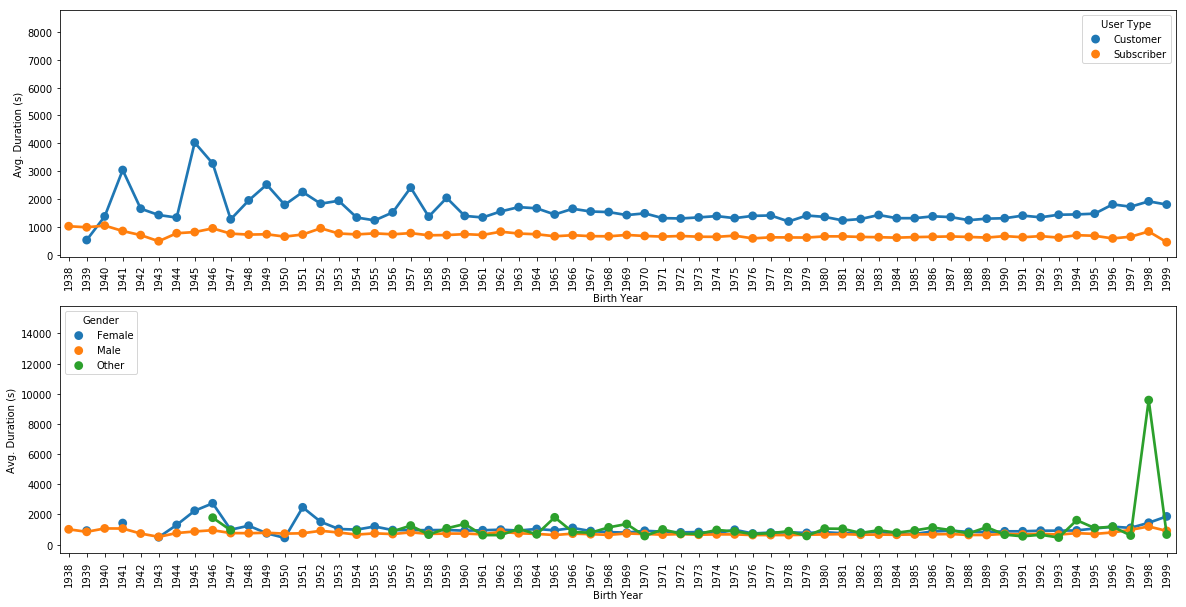

In [43]:
plt.figure(figsize=[20, 10])

# plot the point plot of the birth year vs. user type
plt.subplot(2, 1, 1)
sns.pointplot(data=df_clean, x='member_birth_year', y='duration_sec', errwidth=0, hue='user_type')
plt.xticks(rotation=90)
plt.xlabel('Birth Year')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='User Type')

# plot the point plot of the birth year vs. gender
plt.subplot(2, 1, 2)
sns.pointplot(data=df_clean, x='member_birth_year', y='duration_sec', errwidth=0, hue='member_gender')
plt.xticks(rotation=90)
plt.xlabel('Birth Year')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='Gender');

The point plot shows the customer has a higher average duration than subscriber. Different genders share the same average duration, but there is a spike in other gender people born at 1998.
### 4.2 Duration vs. Month vs. Categorical Variables

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


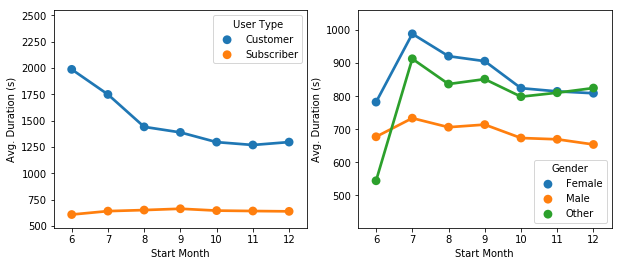

In [44]:
plt.figure(figsize=[10, 4])

# plot the point plot of month vs user type
plt.subplot(1, 2, 1)
sns.pointplot(data=df_clean, x='start_month', y='duration_sec', hue='user_type', errwidth=0)
plt.xlabel('Start Month')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='User Type')

# plot the point plot of month vs gender
plt.subplot(1, 2, 2)
sns.pointplot(data=df_clean, x='start_month', y='duration_sec', hue='member_gender', errwidth=0)
plt.xlabel('Start Month')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='Gender');

The time series plot shows that for different user types, the trend of subscriber keep stable while the trend of customer decreases. This is the reason why the average duration decreases after July. For different genders, the trend is nearly the same. The interesting thing is that, despite that other gender people accounts for the least proportion, their average duration increases rapidly and keeps stable.
### 4.3 Categorical vs. Categorical vs. Duration
Now we use the adapted bar chart to add average duration.

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


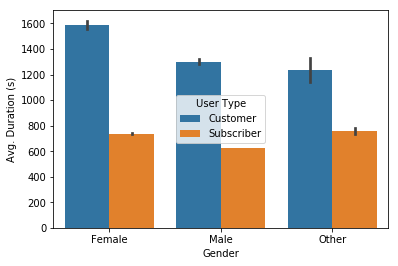

In [45]:
# plot the relationship between user type and gender
sns.barplot(data=df_clean, x='member_gender', y='duration_sec', hue='user_type')
plt.xlabel('Gender')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='User Type');

The customer has a larger average duration than the subscriber. The female customer's duration is the largest one. And the other customer has a large duration even if the number of them is small.

### 4.4 Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- The distribution of duration for different people is nearly the same.
- The customer has a higher average duration than the subsriber.

### 4.5 Were there any interesting or surprising interactions between features?
- The average duration of customer decreases rapidly.
- The average duration of the other increases rapidly and keep stable.
- The future market can be considered to target the other customer in order to make them become subscribers quickly.